In [1]:
import csv
 
f = open('미래에셋증권_공모전데이터.csv', 'r', encoding='utf-8')
lines = csv.reader(f)

n = 0

#아래에서 선별할 variable들을 모을 list
list_all = []

for line in lines:
    
    #1열을 뽑아내서 각 행들의 observation을 row_name이란 리스트로 저장
    if(n==0):       
        row_name = line
        buy_hold_percent = [row_name.index('Buy&Hold비중_202105'),row_name.index('Buy&Hold비중_202104'),
                            row_name.index('Buy&Hold비중_202103'),row_name.index('Buy&Hold비중_202102'),
                            row_name.index('Buy&Hold비중_202101'),row_name.index('Buy&Hold비중_202012'),
                            row_name.index('Buy&Hold비중_202011'),row_name.index('Buy&Hold비중_202010'),
                            row_name.index('Buy&Hold비중_202009'),row_name.index('Buy&Hold비중_202008'), 
                            row_name.index('Buy&Hold비중_202007'),row_name.index('Buy&Hold비중_202006')]
    n +=1   
    
    #20대와 30대 연령만 선별
    if( (line[1].find('20') != -1) or (line[1].find('30') != -1) ):
        #buy&hold비중이 과반수를 넘기는 사람만 선별
        for num in buy_hold_percent :
            num = int(num)            
            if(int(float(line[num]) > 50)):
                list_all.append(line)    
    
f.close()    

In [2]:
#저희의 분석 대상인 "20, 30대면서 buy&hold비중이 과반을 넘기는 고객"이 약 10만명임을 알아냈습니다. 
len(list_all)

106842

In [3]:
row_name

['\ufeff성별',
 '연령',
 '최초계좌개설일',
 '고객등급_202105',
 '주거래상품_202105',
 '주거래매체_202105',
 '국내주식자산_202105',
 '해외주식자산_202105',
 '상품자산_202105',
 '보유종목수_202105',
 '국내주식매수_202105',
 '국내주식매도_202105',
 '해외주식매수_202105',
 '해외주식매도_202105',
 '거래종목수_202105',
 'm.Stock_접속일수_202105',
 'm.Global_접속일수_202105',
 'm.All_접속일수_202105',
 '퇴직연금자산_202105',
 '개인연금자산_202105',
 '코스피거래비중_202105',
 '코스닥거래비중_202105',
 '선호시장_202105',
 '손절횟수_202105',
 '이익실현횟수_202105',
 'DayTrading비중_202105',
 'Swing비중_202105',
 'Buy&Hold비중_202105',
 '시총1천억미만선호도_202105',
 '시총1천억이상3천억미만선호도_202105',
 '시총3천억이상1조미만선호도_202105',
 '시총1조이상선호도_202105',
 '신용_202105',
 '주식보유1위종목_202105',
 '주식보유2위종목_202105',
 '주식보유3위종목_202105',
 '주식보유1위금액_202105',
 '주식보유2위금액_202105',
 '주식보유3위금액_202105',
 '주식매수1위종목_202105',
 '주식매수2위종목_202105',
 '주식매수3위종목_202105',
 '주식매수1위금액_202105',
 '주식매수2위금액_202105',
 '주식매수3위금액_202105',
 '주식매도1위종목_202105',
 '주식매도2위종목_202105',
 '주식매도3위종목_202105',
 '주식매도1위금액_202105',
 '주식매도2위금액_202105',
 '주식매도3위금액_202105',
 'Dr.Big의국내주식_202105',
 'Dr.Bi

In [4]:
#20년 7월부터 21년 5월까지 '주식보유1위종목의 column값'
hold_rank1 = [row_name.index('주식보유1위종목_202105'),row_name.index('주식보유1위종목_202104'),
              row_name.index('주식보유1위종목_202103'),row_name.index('주식보유1위종목_202102'),
              row_name.index('주식보유1위종목_202101'),row_name.index('주식보유1위종목_202012'),
              row_name.index('주식보유1위종목_202011'),row_name.index('주식보유1위종목_202010'),
              row_name.index('주식보유1위종목_202009'),row_name.index('주식보유1위종목_202008'),
              row_name.index('주식보유1위종목_202007'),row_name.index('주식보유1위종목_202006')]

hold_rank1

[33, 91, 149, 207, 265, 323, 381, 439, 497, 555, 613, 671]

In [5]:
#2020년 7월부터 2021년 5월까지 '주식보유1,2,3위종목의 column값' 
#주식보유1위종목의 column값에 각각 1과 2를 더하면 주식보유 2위, 3위 종목도 알 수 있다.)

hold_rank_123 = []

for i in hold_rank1 :
    hold_rank_123.append(i)
    hold_rank_123.append(i+1)
    hold_rank_123.append(i+2)        

In [6]:
##20년 8월부터 21년 5월까지 '주식보유1,2,3위'를 기록한 종목(key)와 보유금액(value)을 총합한 dictionary
stock_hold_total = {}

In [7]:
for list in list_all : 
    for index in hold_rank_123 :        
        name = str(list[index])
        stock_hold_total[name] = stock_hold_total.get(name, 0) + int(float(list[index+3]))
        
#주식보유 1,2,3위 종목이 0인 경우 삭제, 즉 result딕셔너리에서 key값이 0인 경우 제외
del stock_hold_total['0']
        
stock_hold_total       

{'A097230': 2036678000,
 'A302440': 28720168400,
 'A015760': 86168925900,
 'A005930': 1016406935100,
 'A066570': 52385687800,
 'A000270': 33210734000,
 'A034220': 71986907400,
 'A035420': 102882467100,
 'A056080': 1828720000,
 'A051910': 69131282000,
 'A009540': 22073453000,
 'A012450': 12662752000,
 'A248070': 1050087000,
 'A084695': 150000000,
 'A084690': 127700000,
 'A033780': 25378683400,
 'A049720': 961992000,
 'A086280': 21600777000,
 'A035720': 241542637800,
 'A090430': 33166260000,
 'A006400': 47085366100,
 'A047810': 42254533600,
 'A005935': 213078400400,
 'A035460': 69718000,
 'A012790': 3206580000,
 'A361610': 33502987000,
 'A338220': 4147401000,
 'A108490': 542010000,
 'A277810': 1519224000,
 'A139480': 10986240000,
 'A204320': 6469403000,
 'A035760': 13255749000,
 'A028150': 72030000,
 'A085370': 12132251500,
 'A000660': 66594439000,
 'A097950': 6258872400,
 'A012330': 20982028300,
 'A214320': 445789000,
 'A046140': 16360000,
 'A095720': 4441081000,
 'A003490': 75141614800

In [8]:
#20년 8월부터 21년 5월까지의 '주식보유1,2,3위'에 언급된 종목의 수
len(stock_hold_total.keys())

2311

In [9]:
sorted_stock_hold_total = sorted(stock_hold_total.items(),key=(lambda x:x[1]), reverse =True)

[('A005930', 1016406935100), ('A035720', 241542637800), ('A068270', 227763841500), ('A005935', 213078400400), ('A030200', 194141226900), ('A005380', 108014229500), ('A035420', 102882467100), ('A015760', 86168925900), ('A003490', 75141614800), ('A034220', 71986907400), ('A051910', 69131282000), ('A000660', 66594439000), ('A006800', 62620937600), ('A005490', 61518338200), ('A091990', 58000688900), ('A011200', 52751617500), ('A066570', 52385687800), ('A215600', 47369587700), ('A006400', 47085366100), ('A004020', 45027317100), ('A047810', 42254533600), ('A028260', 40257433100), ('A042660', 39978022500), ('A028300', 39828825400), ('A010140', 39248891800), ('A011170', 34041824600), ('A361610', 33502987000), ('A000270', 33210734000), ('A090430', 33166260000), ('A028050', 33087300000), ('A207940', 31465949900), ('A000720', 30383589800), ('A017670', 30278538400), ('A302440', 28720168400), ('A00680K', 28175178800), ('A105560', 27952103900), ('A055550', 27459344000), ('A079160', 27302208800), ('A

In [ ]:
## 시각화

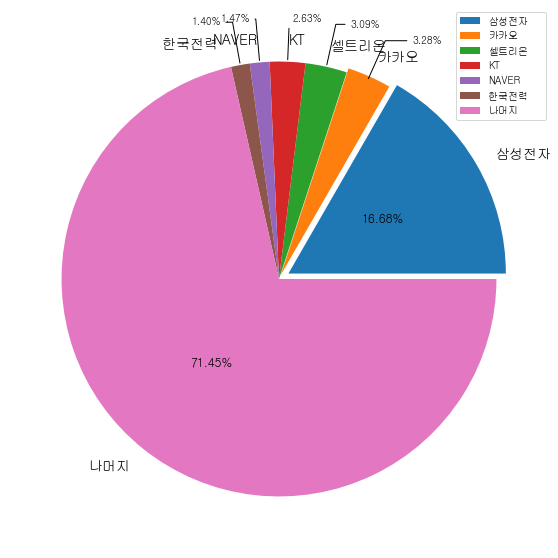

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

ratio = []
labels = []

n = -1
ratio_sum = 0
for i in sorted_stock_hold_total :
    n += 1
    if(n<7):
        labels.append(i[0])
        ratio.append(i[1])
    else : 
        ratio_sum += i[1]
        
labels.append('나머지')
ratio.append(ratio_sum)        

labels[0] = '삼성전자'
labels[1] = '카카오'
labels[2] = '셀트리온'
labels[3] = '삼성전자우'
labels[4] = 'KT'
labels[5] = "NAVER"
labels[6] = '한국전력    '

#삼성전자우를 삼성전자에 포함시키기 
del labels[3]
ratio[0] += ratio[3]
del ratio[3]


fig = plt.figure(figsize=(10,10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 

explode = [0.05, 0.02, 0, 0, 0, 0, 0]

#한국어 폰트
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#pie chart에 parameter입력
pie = ax.pie(ratio, explode = explode, labels = labels,  textprops={'fontsize': 14}) 

#아래 코드는 비율이 겹치지 않고 가독성 있게 합니다.
total = np.sum(ratio) 
threshold = 5 
sum_pct = 0 
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) 
 
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if i < len(labels) - 1:
        sum_pct += float(f'{ratio[i]/total*100:.2f}')
        text = f'{ratio[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    
    if ratio[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang))
        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) 
        config["arrowprops"].update({"connectionstyle": connectionstyle}) 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        ax.text(x,y,text,ha='center',va='center',fontsize=12)

# 최종적으로 파이차트 구현
plt.legend(loc = 'upper right')
plt.show()

